<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Выбор-признаков" data-toc-modified-id="Выбор-признаков-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Выбор признаков</a></span></li><li><span><a href="#Работа-с-пропусками" data-toc-modified-id="Работа-с-пропусками-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Работа с пропусками</a></span></li><li><span><a href="#Прямое-кодирование" data-toc-modified-id="Прямое-кодирование-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Прямое кодирование</a></span></li><li><span><a href="#Выборки" data-toc-modified-id="Выборки-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Выборки</a></span></li><li><span><a href="#Стандартизация-данных" data-toc-modified-id="Стандартизация-данных-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Стандартизация данных</a></span></li></ul></li><li><span><a href="#Функции-подбора" data-toc-modified-id="Функции-подбора-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Функции подбора</a></span></li><li><span><a href="#Обучение-без-балансировки" data-toc-modified-id="Обучение-без-балансировки-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Обучение без балансировки</a></span><ul class="toc-item"><li><span><a href="#Логистическая-регрессия" data-toc-modified-id="Логистическая-регрессия-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Логистическая регрессия</a></span></li><li><span><a href="#Решающее-дерево" data-toc-modified-id="Решающее-дерево-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Решающее дерево</a></span></li><li><span><a href="#Случайный-лес" data-toc-modified-id="Случайный-лес-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Случайный лес</a></span></li></ul></li><li><span><a href="#Обучение-с-балансировкой" data-toc-modified-id="Обучение-с-балансировкой-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Обучение с балансировкой</a></span><ul class="toc-item"><li><span><a href="#Логистичсекая-регрессия" data-toc-modified-id="Логистичсекая-регрессия-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Логистичсекая регрессия</a></span></li><li><span><a href="#Решающее-дерево" data-toc-modified-id="Решающее-дерево-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Решающее дерево</a></span></li><li><span><a href="#Случайный-лес" data-toc-modified-id="Случайный-лес-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Случайный лес</a></span></li></ul></li><li><span><a href="#Обучение-на-другой-выборке" data-toc-modified-id="Обучение-на-другой-выборке-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Обучение на другой выборке</a></span><ul class="toc-item"><li><span><a href="#Логистическая-регрессия" data-toc-modified-id="Логистическая-регрессия-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Логистическая регрессия</a></span></li><li><span><a href="#Решающее-дерево" data-toc-modified-id="Решающее-дерево-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Решающее дерево</a></span></li><li><span><a href="#Случайный-лес" data-toc-modified-id="Случайный-лес-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Случайный лес</a></span></li></ul></li><li><span><a href="#Выбор-модели" data-toc-modified-id="Выбор-модели-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Выбор модели</a></span></li><li><span><a href="#Вменяемость" data-toc-modified-id="Вменяемость-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Вменяемость</a></span></li><li><span><a href="#Тестирование" data-toc-modified-id="Тестирование-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Тестирование</a></span></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Выводы</a></span></li></ul></div>

# Отток клиентов

Банк-заказчик теряет клиентов.

Чтобы остановить или хотя бы затормозить этот процесс нужно составить список клиентов, которые потенциально могут расторгнуть договор с банком.

Решать эту задачу будем методами машинного обучения на основании данных о поведении клиентов. Попробуем обучить модели на разных вариантах исходного датасета так, чтобы учесть дисбаланс классов.

Поскольку это задача классификации, основной метрикой качества модели будет F1-мера и AUC-ROC.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler 
from sklearn.utils import shuffle

from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score
from sklearn.metrics import precision_recall_curve, roc_curve, roc_auc_score
from sklearn.metrics import plot_roc_curve

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier

## Предобработка данных

In [2]:
try:
    data = pd.read_csv('Churn.csv')
except:
    data = pd.read_csv('/datasets/Churn.csv')

In [3]:
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5.0,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10.0,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7.0,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3.0,75075.31,2,1,0,92888.52,1


Признаки
- RowNumber — индекс строки в данных
- CustomerId — уникальный идентификатор клиента
- Surname — фамилия
- CreditScore — кредитный рейтинг
- Geography — страна проживания
- Gender — пол
- Age — возраст
- Tenure — сколько лет человек является клиентом банка
- Balance — баланс на счёте
- NumOfProducts — количество продуктов банка, используемых клиентом
- HasCrCard — наличие кредитной карты
- IsActiveMember — активность клиента
- EstimatedSalary — предполагаемая зарплата

Целевой признак
- Exited — факт ухода клиента

### Выбор признаков

1. Колонка RowNumber нам явно не нужна, эти числа не имеют отношения к факту ухода клиента. Обучение модели с их помощью только ухудшит качество.
2. CustomerID, скорее всего, тоже не нужен. Единственный аргумент против заключается в том, что этот номер может отражать порядок регистрации клиентов (лучше бы использовать вместо этого дату). Думаю, его стоит выкинуть.
3. Фамилия, скорее всего, тоже нам не нужна. Разве что какие-то аферисты регистрируются с похожими фамилиями, но это больше к аналитикам.
4. Данные в остальных столбцах могут быть связаны с уходом клиента.
5. Видны пропуски в столбце Tenure, их стоит изучить.
6. Интересно, как определяется, что клиент активен.


In [4]:
data = data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           9091 non-null   float64
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(3), int64(6), object(2)
memory usage: 859.5+ KB


### Работа с пропусками

Посмотрим на пропуски в столбце "Tenure":

In [5]:
data.loc[data['Tenure'].isna()]

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
30,591,Spain,Female,39,NaN,0.00,3,1,0,140469.38,1
48,550,Germany,Male,38,NaN,103391.38,1,0,1,90878.13,0
51,585,Germany,Male,36,NaN,146050.97,2,0,0,86424.57,0
53,655,Germany,Male,41,NaN,125561.97,1,0,0,164040.94,1
60,742,Germany,Male,35,NaN,136857.00,1,0,0,84509.57,0
...,...,...,...,...,...,...,...,...,...,...,...
9944,744,Germany,Male,41,NaN,190409.34,2,1,1,138361.48,0
9956,520,France,Female,46,NaN,85216.61,1,1,0,117369.52,1
9964,479,France,Male,34,NaN,117593.48,2,0,0,113308.29,0
9985,659,France,Male,36,NaN,123841.49,2,1,0,96833.00,0


На первый взгляд нет различией с основным датасетом.

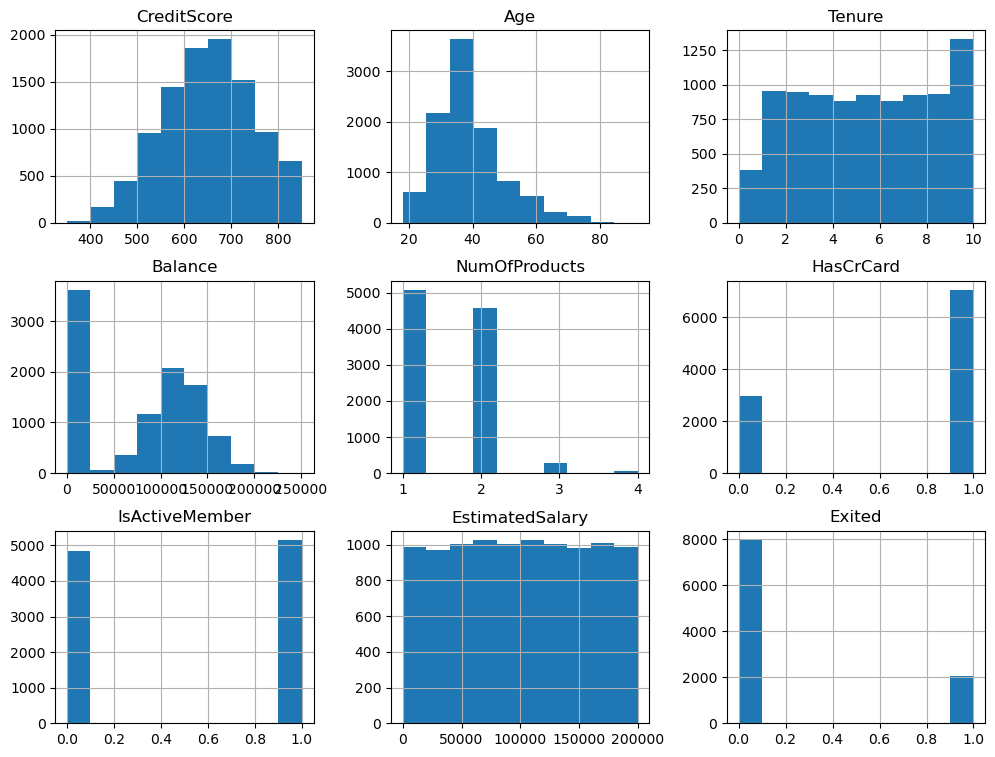

In [6]:
data.hist(figsize=(12, 9));

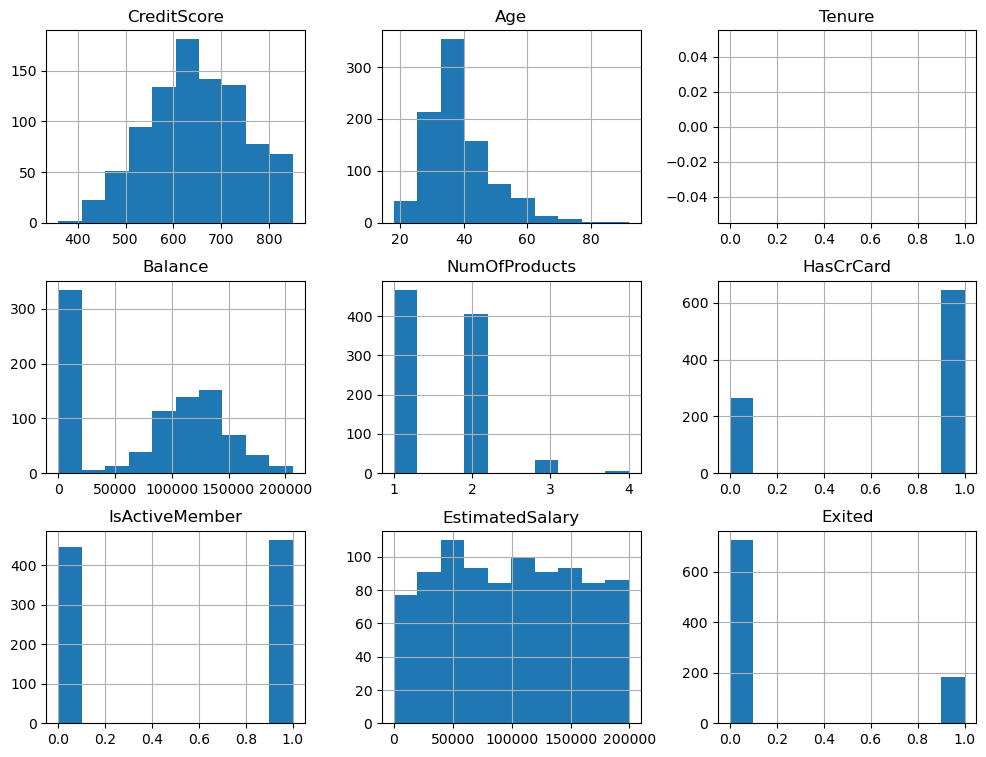

In [7]:
data.loc[data['Tenure'].isna()].hist(figsize=(12, 9));

Ну да, похоже, что нет.

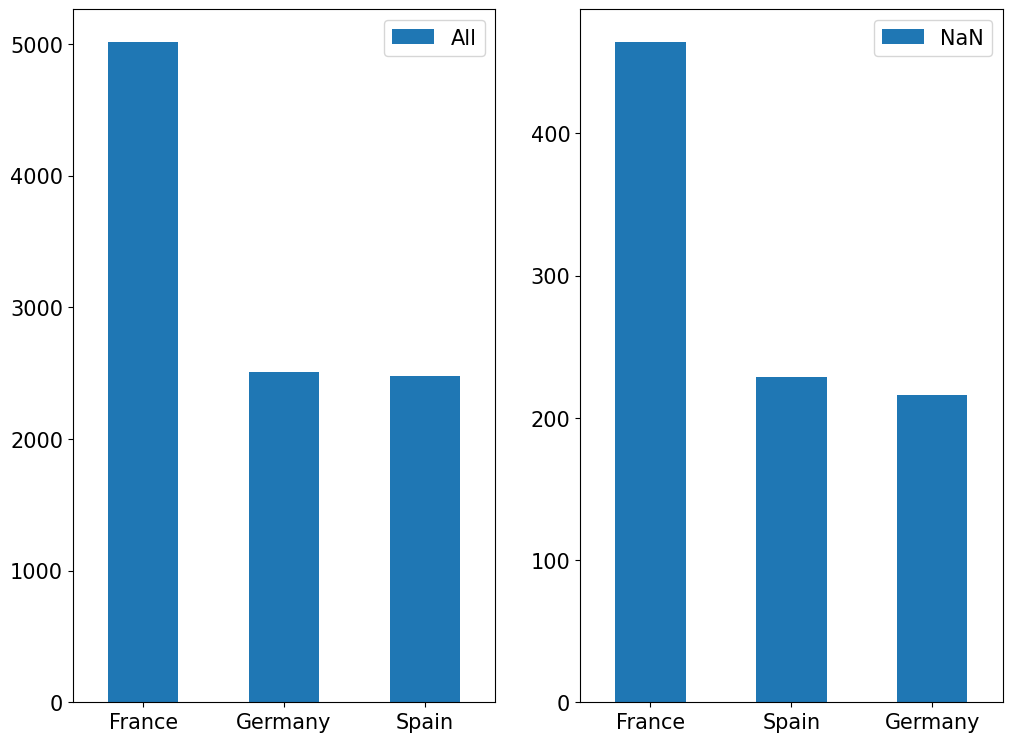

In [8]:
plt.subplot(1, 2, 1)
(data['Geography']
 .value_counts()
 .plot(kind='bar', label='All', rot=0, figsize=(12, 9)))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=15)

plt.subplot(1, 2, 2)
(data['Geography']
 .loc[data['Tenure'].isna()]
 .value_counts()
 .plot(kind='bar', label='NaN', rot=0, figsize=(12, 9)))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=15)

plt.show()

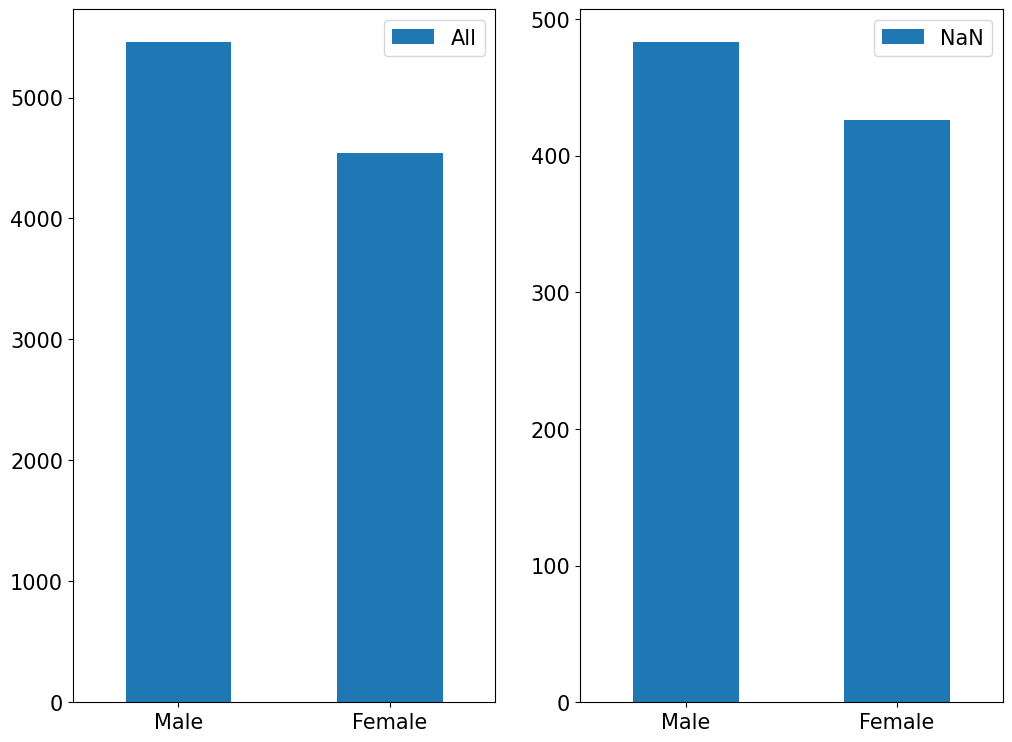

In [9]:
plt.subplot(1, 2, 1)
(data['Gender']
 .value_counts()
 .plot(kind='bar', label='All', rot=0, figsize=(12, 9)))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=15)

plt.subplot(1, 2, 2)
(data['Gender']
 .loc[data['Tenure'].isna()]
 .value_counts()
 .plot(kind='bar', label='NaN', rot=0, figsize=(12, 9)))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=15)

plt.show()

По категориальным переменным тоже. Похоже, пропуски не имеют логического объяснения (то есть случайны) и появились в результате технической ошибки. 

Продолжительность сотрудничества клиента с банком – важный параметр. К сожалению, эти 10% датасета придётся выкинуть (хотя бы потому что модели sklearn не работают с пропусками и не смогут учесть другие данные в этих строках).

In [10]:
data = data.dropna(subset=['Tenure'])

### Прямое кодирование

In [11]:
data.duplicated().sum()

0

Явных дубликатов нет.

In [12]:
data_ohe = pd.get_dummies(data, drop_first=True) # во избежание dummy-ловушки
data_ohe

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2.0,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1.0,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8.0,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1.0,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2.0,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9994,800,29,2.0,0.00,2,0,0,167773.55,0,0,0,0
9995,771,39,5.0,0.00,2,1,0,96270.64,0,0,0,1
9996,516,35,10.0,57369.61,1,1,1,101699.77,0,0,0,1
9997,709,36,7.0,0.00,1,0,1,42085.58,1,0,0,0


Неявных дубликатов тоже нет, иначе появились бы лишние столбцы.

Аргумент `drop_first=True` выкинул колонки со списком женщин и Францию.

### Выборки

In [13]:
features = data_ohe.drop('Exited', axis=1)
target = data_ohe['Exited']

(features_train, 
 features_valid, 
 features_test) = np.split(features.sample(frac=1, random_state=57), 
                           [int(0.6*len(features)), int(0.8*len(features))])
(target_train, 
 target_valid, 
 target_test) = np.split(target.sample(frac=1, random_state=57), 
                           [int(0.6*len(target)), int(0.8*len(target))])

In [14]:
features_train

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
2067,744,31,9.0,120718.28,1,1,1,58961.49,0,0,1
76,664,55,8.0,0.00,2,1,1,139161.64,0,0,1
2164,767,77,8.0,149083.70,1,1,1,190146.83,0,1,1
6892,649,56,8.0,156974.26,1,1,0,89405.26,0,0,0
7369,644,26,4.0,153455.72,2,1,1,82696.84,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
3113,620,32,7.0,0.00,2,1,1,34665.79,0,0,1
9475,616,46,2.0,0.00,2,1,0,137136.46,0,0,1
7003,646,44,2.0,113063.83,1,0,0,53072.49,1,0,0
4000,520,38,5.0,0.00,2,1,0,163185.76,0,0,1


In [15]:
target_valid

6380    1
4565    0
9322    0
604     0
5198    0
       ..
2830    0
7913    0
9126    1
3379    0
1757    1
Name: Exited, Length: 1818, dtype: int64

### Стандартизация данных

Проведём масштабирование, исходя из данных тренировочной выборки.

In [16]:
numeric = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

scaler = StandardScaler()
scaler.fit(features_train[numeric])

features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])
features_valid

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
6380,-0.500768,-0.372859,-1.369166,0.750231,-0.905589,1,0,0.894022,1,0,1
4565,-0.603863,0.663860,-1.025266,0.002282,-0.905589,1,1,-0.806120,0,1,0
9322,1.190006,-0.372859,1.382029,-1.221631,0.789943,1,0,-1.065109,0,0,0
604,0.519882,-0.184364,1.725928,1.183536,-0.905589,1,1,-0.108046,0,0,1
5198,-0.490458,0.098377,-1.369166,0.125591,-0.905589,0,0,-1.122351,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
2830,-0.789436,1.323590,-1.369166,0.134991,0.789943,0,1,-1.299029,0,1,1
7913,1.581770,-1.409577,0.350331,1.066822,0.789943,1,0,1.474564,1,0,1
9126,1.045671,1.135096,-0.337468,0.053635,0.789943,0,1,-0.566814,0,1,1
3379,1.561151,0.569613,0.694230,-1.221631,0.789943,1,1,0.475195,0,1,0


Резюмируя:
1. Обучение проводилось без учёта индексации, идентификаторов клиентов и их фамилий, поскольку эти данные вряд ли связаны с причиной ухода клиента.
2. В столбце "Tenure" нашлось 9% случайных пропусков. Эти строчки были удалены.
3. Две категориальные переменные – географическое расположение и пол клиента – были преобразованы по алгоритму прямого кодирования, причём данные о проживании клиента во Франции и о клиентах женского пола были удалены как лишние. 
4. Для численных данных было проведено масштабирование, основанное на данных из тренировочной выборки.

Обучим модель на данных такого формата.

## Функции подбора

Рассматривать будем логистическую регрессию, решающие деревья и случайный лес.

In [17]:
def plant_a_tree(def_features_train, 
                 def_target_train, 
                 def_features_valid, 
                 def_target_valid, 
                 balance=None):
    best_model = None
    best_depth = 0
    best_f1 = 0

    for depth in range(1, 20):
        def_model = DecisionTreeClassifier(max_depth=depth, 
                                           class_weight=balance, 
                                           random_state=57)
        def_model.fit(def_features_train, def_target_train)
        def_predicted_valid = def_model.predict(def_features_valid)
        current_f1 = f1_score(def_target_valid, def_predicted_valid)
        if current_f1 > best_f1:
            best_model = def_model
            best_depth = depth
            best_f1 = current_f1
            
    return best_model

Возможно, вложенные циклы дадут более точный результат, но это слишком долго, поэтому сначала подберём глубину, потом – число деревьев.

In [18]:
def plant_a_forest(def_features_train, 
                   def_target_train, 
                   def_features_valid, 
                   def_target_valid, 
                   balance=None):
    # %%time
    best_depth = 0
    best_f1 = 0
    for depth in range(1, 30):
        def_model = RandomForestClassifier(n_estimators=30, 
                                           max_depth=depth, 
                                           class_weight=balance, 
                                           random_state=57)
        def_model.fit(def_features_train, def_target_train)
        def_predicted_valid = def_model.predict(def_features_valid)
        current_f1 = f1_score(def_target_valid, def_predicted_valid)
        if current_f1 > best_f1:
            best_depth = depth
            best_f1 = current_f1
    
    best_model = None
    best_est = 0
    best_f1 = 0
    for est in range(1, 100):
        def_model = RandomForestClassifier(n_estimators=est, 
                                           max_depth=best_depth, 
                                           class_weight=balance, 
                                           random_state=57)
        def_model.fit(def_features_train, def_target_train)
        def_predicted_valid = def_model.predict(def_features_valid)
        current_f1 = f1_score(def_target_valid, def_predicted_valid)
        if current_f1 > best_f1:
            best_model = def_model
            best_est = est
            best_f1 = current_f1
            
    return best_model

In [19]:
def plot_confusion_matrix(def_model, def_features_valid, def_target_valid):
    def_predicted_valid = def_model.predict(def_features_valid)

    print('Confusion matrix:')
    print(confusion_matrix(def_target_valid, def_predicted_valid))
    
    fig, ax = plt.subplots()
    fig = sb.heatmap(confusion_matrix(def_target_valid, def_predicted_valid, normalize='true'), 
                     annot=True)
    plt.yticks(rotation=0)
    ax.set_ylabel('Answers', rotation=0);
    ax.set_xlabel('Predictions');
    ax.yaxis.labelpad = 20
    plt.show()

In [20]:
def roc_graph(def_model, def_features_valid, def_target_valid):
    def_predicted_valid = def_model.predict(def_features_valid)
    
    print('Recall:', recall_score(def_target_valid, def_predicted_valid))
    print('Precision:', precision_score(def_target_valid, def_predicted_valid))
    print('F1-score:', f1_score(def_target_valid, def_predicted_valid))
    
    plot_roc_curve(def_model, def_features_valid, def_target_valid);
    plt.show()

## Обучение без балансировки

### Логистическая регрессия

LogisticRegression:
Accuracy: 0.8201320132013201 

Confusion matrix:
[[1417   60]
 [ 267   74]]


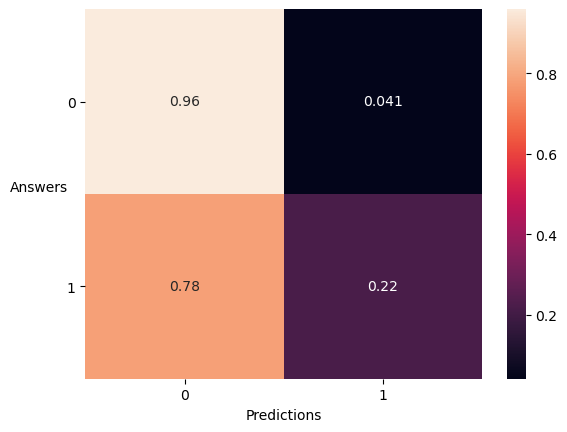

Recall: 0.21700879765395895
Precision: 0.5522388059701493
F1-score: 0.311578947368421


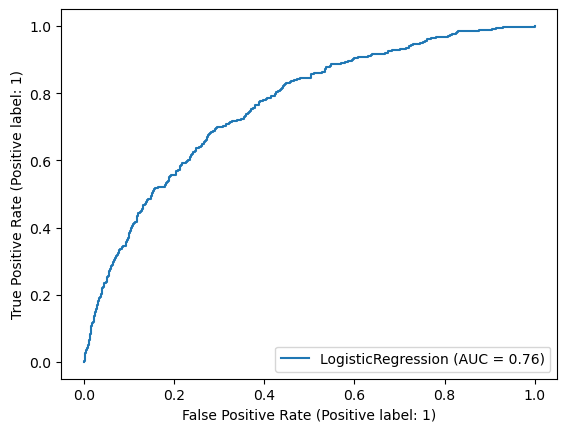

In [21]:
model = LogisticRegression(solver='liblinear', random_state=57)
model.fit(features_train, target_train)

print('LogisticRegression:')
print('Accuracy:', model.score(features_valid, target_valid), '\n')
plot_confusion_matrix(model, features_valid, target_valid)
roc_graph(model, features_valid, target_valid)

Очень много ошибок второго рода.

### Решающее дерево

DecisionTreeClassifier:
Accuracy: 0.8641364136413642
Depth: 7 

Confusion matrix:
[[1405   72]
 [ 175  166]]


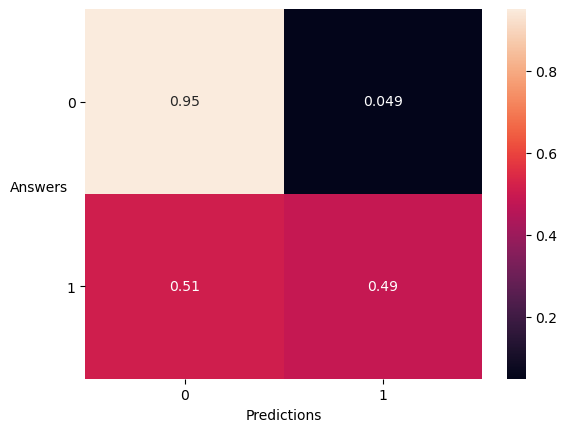

Recall: 0.4868035190615836
Precision: 0.6974789915966386
F1-score: 0.5734024179620034


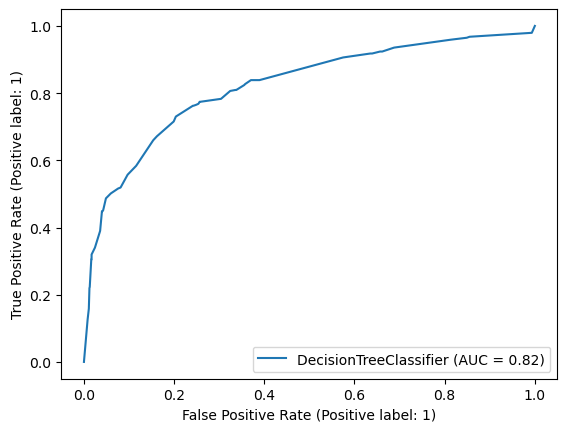

In [22]:
best_tree = plant_a_tree(features_train, target_train, features_valid, target_valid)

print('DecisionTreeClassifier:')
print('Accuracy:', best_tree.score(features_valid, target_valid))
print('Depth:', best_tree.max_depth, '\n')

plot_confusion_matrix(best_tree, features_valid, target_valid)
roc_graph(best_tree, features_valid, target_valid)

Заметный прогресс по сравнению с регрессией. Ошибок почти столько же, сколько верных ответов (в том, что касается положительного класса).

### Случайный лес

RandomForestClassifier:
Accuracy: 0.8745874587458746
Depth: 18
Estimators: 22 

Confusion matrix:
[[1424   53]
 [ 175  166]]


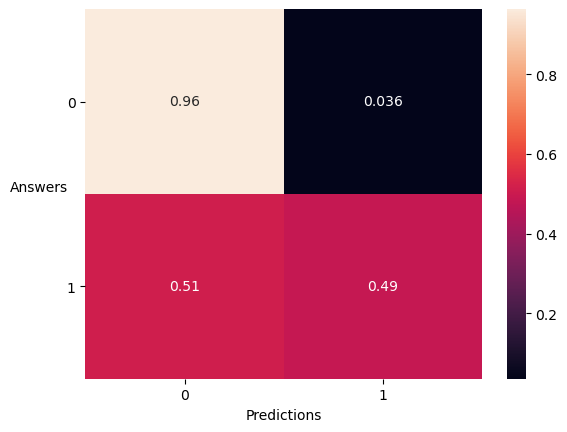

Recall: 0.4868035190615836
Precision: 0.7579908675799086
F1-score: 0.5928571428571429


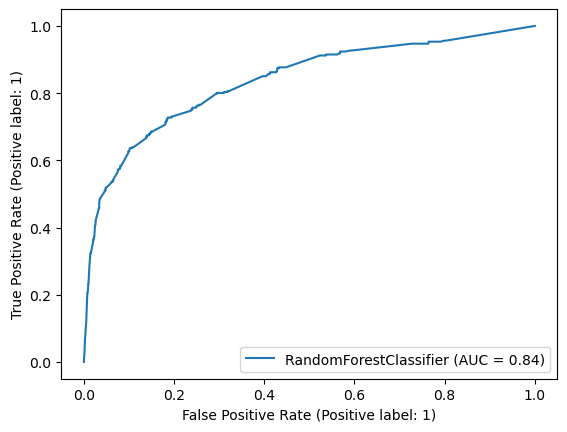

CPU times: user 39.8 s, sys: 243 ms, total: 40.1 s
Wall time: 40.1 s


In [23]:
%%time
best_forest = plant_a_forest(features_train, target_train, features_valid, target_valid)

print('RandomForestClassifier:')
print('Accuracy:', best_forest.score(features_valid, target_valid))
print('Depth:', best_forest.max_depth)
print('Estimators:', best_forest.n_estimators, '\n')

plot_confusion_matrix(best_forest, features_valid, target_valid)
roc_graph(best_forest, features_valid, target_valid)

AUC-ROC чуть увеличился, хотя единицу предсказывают реже, чем у случайного дерева. Видимо, связано с лучшим предсказанием нулей.

Сами метрики у моделей без балансировки классов почти приемлемые, но число верно найденных объектов положительного класса нужно увеличивать.

## Обучение с балансировкой

Посмотрим теперь на баланс классов.

In [24]:
data_ohe

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2.0,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1.0,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8.0,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1.0,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2.0,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9994,800,29,2.0,0.00,2,0,0,167773.55,0,0,0,0
9995,771,39,5.0,0.00,2,1,0,96270.64,0,0,0,1
9996,516,35,10.0,57369.61,1,1,1,101699.77,0,0,0,1
9997,709,36,7.0,0.00,1,0,1,42085.58,1,0,0,0


In [25]:
data_ohe['Exited'].value_counts()

0    7237
1    1854
Name: Exited, dtype: int64

Попробуем обучить только с балансом.

### Логистичсекая регрессия

LogisticRegression:
Accuracy: 0.7062706270627063 

Confusion matrix:
[[1056  421]
 [ 113  228]]


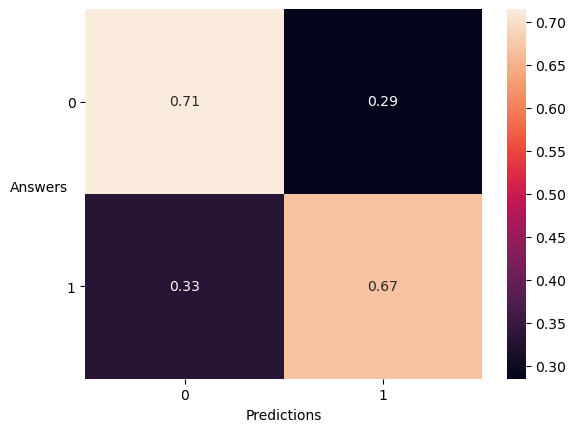

Recall: 0.6686217008797654
Precision: 0.35130970724191063
F1-score: 0.46060606060606063


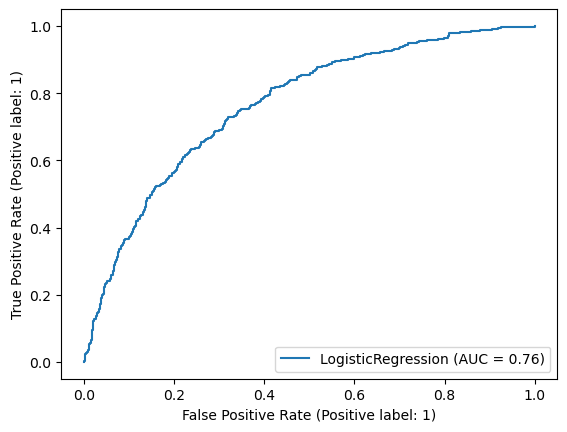

In [26]:
model = LogisticRegression(solver='liblinear', class_weight='balanced', random_state=57)
model.fit(features_train, target_train)

print('LogisticRegression:')
print('Accuracy:', model.score(features_valid, target_valid), '\n')
plot_confusion_matrix(model, features_valid, target_valid)
roc_graph(model, features_valid, target_valid)

Эта матрица уже больше похожа на то, что хотелось бы видеть. Жаль ROC-AUC низкий.

### Решающее дерево

DecisionTreeClassifier:
Accuracy: 0.7876787678767877
Depth: 8 

Confusion matrix:
[[1179  298]
 [  88  253]]


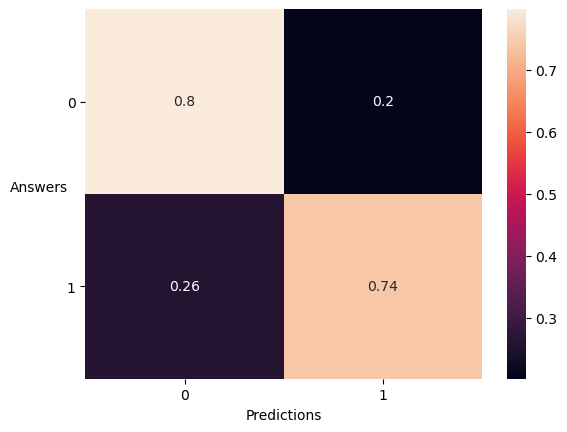

Recall: 0.7419354838709677
Precision: 0.4591651542649728
F1-score: 0.5672645739910314


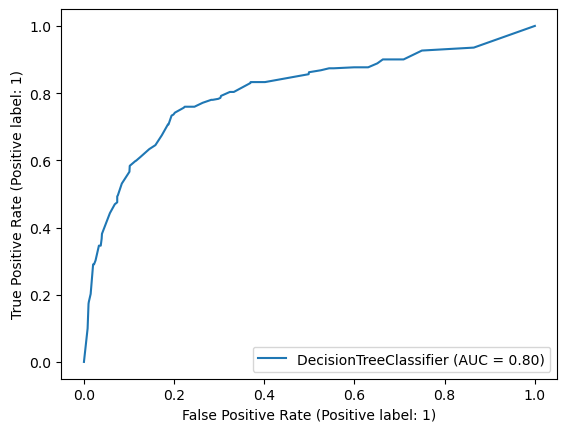

In [27]:
best_tree = plant_a_tree(features_train, target_train, features_valid, target_valid, 'balanced')

print('DecisionTreeClassifier:')
print('Accuracy:', best_tree.score(features_valid, target_valid))
print('Depth:', best_tree.max_depth, '\n')

plot_confusion_matrix(best_tree, features_valid, target_valid)
roc_graph(best_tree, features_valid, target_valid)

Дерево ещё лучше предсказывает. Посмотрим, что будет со случайным лесом.

### Случайный лес

RandomForestClassifier:
Accuracy: 0.858085808580858
Depth: 10
Estimators: 26 

Confusion matrix:
[[1344  133]
 [ 125  216]]


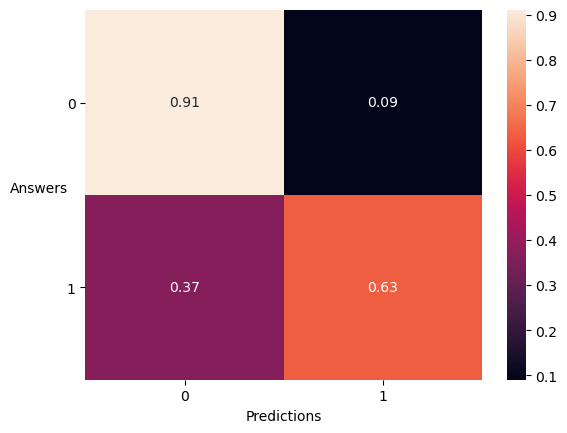

Recall: 0.6334310850439883
Precision: 0.6189111747851003
F1-score: 0.6260869565217392


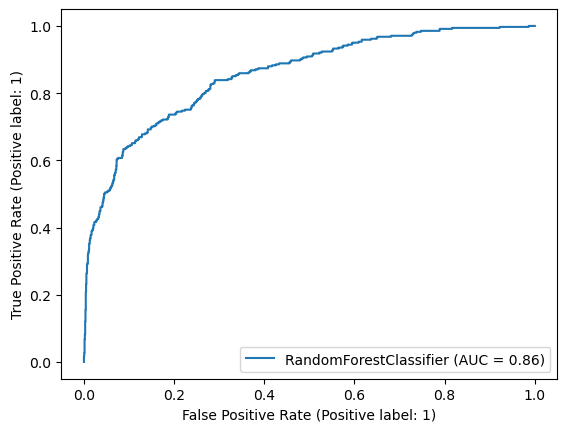

CPU times: user 35.6 s, sys: 188 ms, total: 35.8 s
Wall time: 35.9 s


In [28]:
%%time
best_forest = plant_a_forest(features_train, target_train, features_valid, target_valid, 
                             'balanced')

print('RandomForestClassifier:')
print('Accuracy:', best_forest.score(features_valid, target_valid))
print('Depth:', best_forest.max_depth)
print('Estimators:', best_forest.n_estimators, '\n')

plot_confusion_matrix(best_forest, features_valid, target_valid)
roc_graph(best_forest, features_valid, target_valid)

Тут уже наблюдается перекос.

F1-метрика у случайного леса составляет 0.626, что выше, чем у всех предыдущих моделей. 

Тем не менее, из матрицы ошибок следует, что это было достигнуто за счёт лучшего предсказания нулей, в то время как единицы предсказываются даже хуже, чем решающим деревом. Это не совсем отвечает нашим целям. Больше трети целевых клиентов остаются нераспознанными.

Попробуем уравновесить выборку.

## Обучение на другой выборке

In [29]:
ratio = data_ohe['Exited'].sum() / len(data_ohe['Exited'])
ratio

0.2039379606203938

Уходящих клиентов в датасете в 4 раза меньше, чем остающихся. То есть дисбаланс 1:4.

Баланс классов не так уж сильно нарушен. Увеличим **в 4 раза** число положительных строк и оставим прежним число отрицательных.

In [30]:
def upsample_downsample(def_features, def_target, up, down):
    features_zeros = def_features[def_target == 0]
    features_ones = def_features[def_target == 1]
    target_zeros = def_target[def_target == 0]
    target_ones = def_target[def_target == 1]
    
    features_sampled = pd.concat([features_zeros.sample(frac=1/down, random_state=57)] + 
                                 [features_ones] * up)
    target_sampled = pd.concat([target_zeros.sample(frac=1/down, random_state=57)] + 
                                 [target_ones] * up)
    
    features_sampled, target_sampled = shuffle(features_sampled, 
                                               target_sampled, 
                                               random_state=57)
    
    return features_sampled, target_sampled

In [31]:
print(features_train.shape)
print(target_train.shape)

(5454, 11)
(5454,)


In [32]:
features_sampled, target_sampled = upsample_downsample(features_train, target_train, 4, 1)

In [33]:
target_sampled.value_counts()

1    4476
0    4335
Name: Exited, dtype: int64

### Логистическая регрессия

LogisticRegression:
Accuracy: 0.7062706270627063 

Confusion matrix:
[[1056  421]
 [ 113  228]]


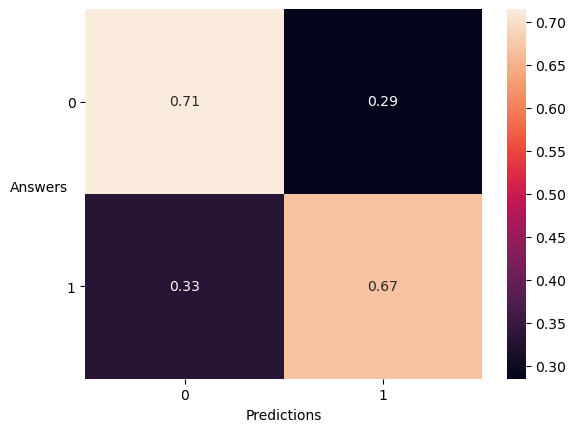

Recall: 0.6686217008797654
Precision: 0.35130970724191063
F1-score: 0.46060606060606063


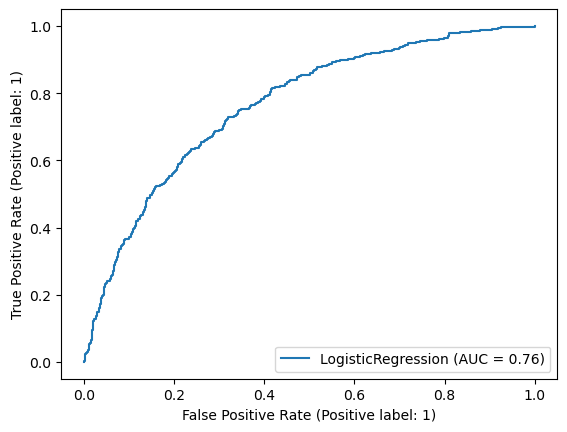

In [34]:
model = LogisticRegression(solver='liblinear', class_weight='balanced', random_state=57)
model.fit(features_sampled, target_sampled)

print('LogisticRegression:')
print('Accuracy:', model.score(features_valid, target_valid), '\n')
plot_confusion_matrix(model, features_valid, target_valid)
roc_graph(model, features_valid, target_valid)

Логистическая регрессия даёт один и тот же результат вне зависимости от алгоритма, числа итераций и умножения строк с положительными объектами. Только веса классов могут на неё повлиять.

### Решающее дерево

DecisionTreeClassifier:
Accuracy: 0.7871287128712872
Depth: 8 

Confusion matrix:
[[1177  300]
 [  87  254]]


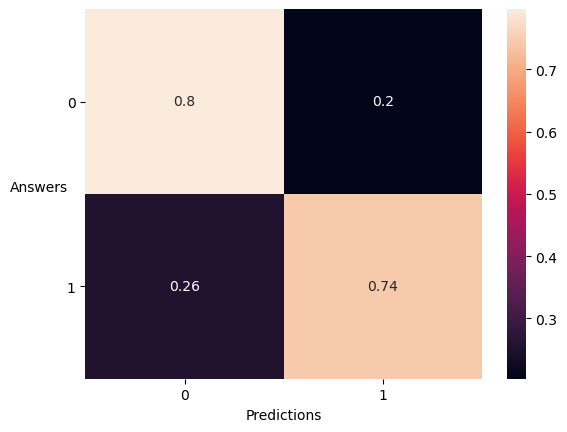

Recall: 0.7448680351906158
Precision: 0.4584837545126354
F1-score: 0.5675977653631284


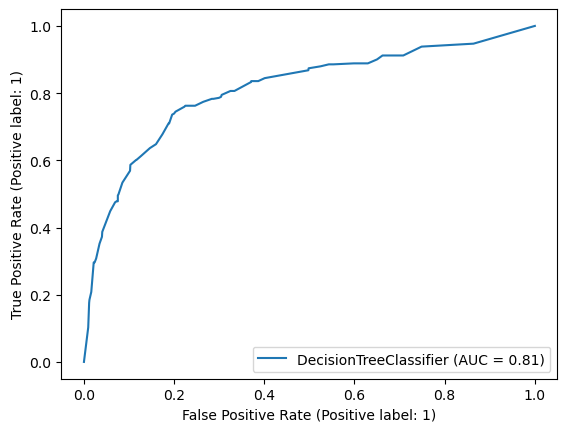

In [35]:
best_tree = plant_a_tree(features_sampled, target_sampled, features_valid, target_valid, 
                         'balanced')

print('DecisionTreeClassifier:')
print('Accuracy:', best_tree.score(features_valid, target_valid))
print('Depth:', best_tree.max_depth, '\n')

plot_confusion_matrix(best_tree, features_valid, target_valid)
roc_graph(best_tree, features_valid, target_valid)

### Случайный лес

RandomForestClassifier:
Accuracy: 0.8591859185918592
Depth: 13
Estimators: 68 

Confusion matrix:
[[1344  133]
 [ 123  218]]


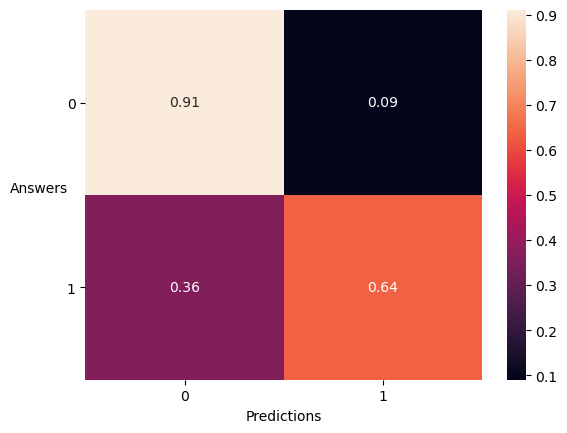

Recall: 0.6392961876832844
Precision: 0.6210826210826211
F1-score: 0.630057803468208


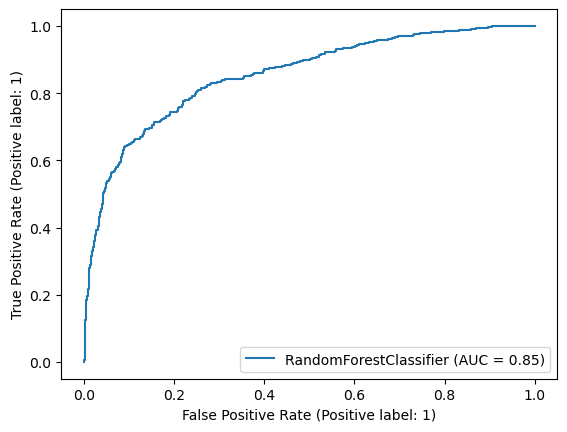

CPU times: user 56.2 s, sys: 272 ms, total: 56.4 s
Wall time: 56.5 s


In [36]:
%%time
best_forest = plant_a_forest(features_sampled, target_sampled, features_valid, target_valid, 
                             'balanced')

print('RandomForestClassifier:')
print('Accuracy:', best_forest.score(features_valid, target_valid))
print('Depth:', best_forest.max_depth)
print('Estimators:', best_forest.n_estimators, '\n')

plot_confusion_matrix(best_forest, features_valid, target_valid)
roc_graph(best_forest, features_valid, target_valid)

Немного лучше по сравнению с исходной разбивкой всё-таки стало.

## Выбор модели

Самые высокие показатели получаются у моделей, которые придают веса классам и построены на выборках, где соотношение нулей и единиц составляет примерно 1:1 (то есть строки с положительными объектами встречаются в 4 раза чаще, чем прежде).

Вот статистика по моделям:

|Модель|Полнота|Точность|F1-мера|AUC-ROC|
|---|---|---|---|---|
|Логистическая регрессия|0.669|0.351|0.461|0.76|
|Решающее дерево|**0.745**|0.458|0.568|0.81|
|Случайный лес|0.639|**0.621**|**0.630**|**0.85**|

Здесь логистическая регрессия построена по алгоритму "liblinear", решающее дерево имеет глубину 8, а случайный лес состоит из 68 деревьев глубиной 13.

Самая высокая F1-мера у случайного леса, однако достигается она скорее за счёт распознавания нулей, а не единиц.

Тут уже возникает вопрос о бизнес-целях. Если нам нужно удержать как можно больше клиентов, то полнота важнее точности и я бы вообще взял решающее дерево, хоть оно и не прошло порог F1 > 0.59. Однако раз у нас стоит это требование, то оставим случайный лес. 

## Вменяемость

Чтобы проверить модель на адекватность, сравним её с моделью, предсказывающей классы, основываясь на их частоте.

DummyClassifier:
Accuracy: 0.6842684268426843 

Confusion matrix:
[[1172  305]
 [ 269   72]]


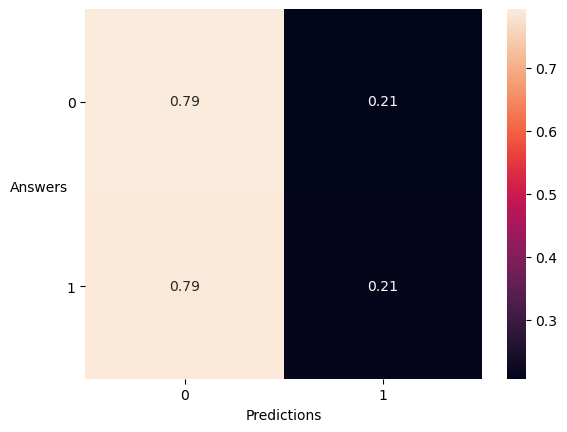

Recall: 0.21114369501466276
Precision: 0.1909814323607427
F1-score: 0.20055710306406685


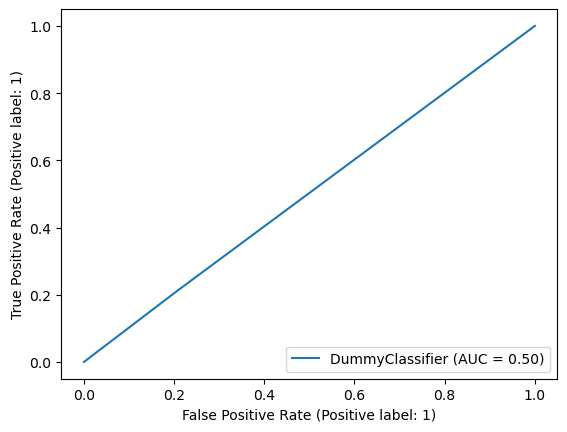

In [37]:
dummy_clf = DummyClassifier(strategy='stratified', random_state=57)
dummy_clf.fit(features_train, target_train)
dummy_clf.score(features_valid, target_valid)

print('DummyClassifier:')
print('Accuracy:', dummy_clf.score(features_valid, target_valid), '\n')

plot_confusion_matrix(dummy_clf, features_valid, target_valid)
roc_graph(dummy_clf, features_valid, target_valid)

Или моделью, предсказывающей только единицы.

DummyClassifier:
Accuracy: 0.18756875687568758 

Recall: 1.0
Precision: 0.18756875687568758
F1-score: 0.3158869847151459


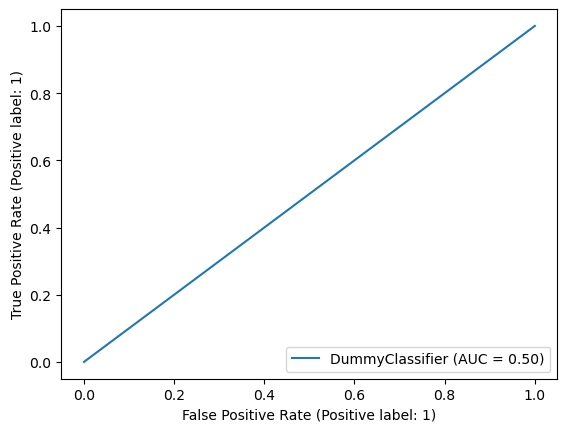

In [38]:
dummy_clf = DummyClassifier(strategy='constant', constant=1)
dummy_clf.fit(features_train, target_train)
dummy_clf.score(features_valid, target_valid)

print('DummyClassifier:')
print('Accuracy:', dummy_clf.score(features_valid, target_valid), '\n')

# plot_confusion_matrix(dummy_clf, features_valid, target_valid)
roc_graph(dummy_clf, features_valid, target_valid)

У выбранного случайного леса немного выше acuracy и заметно выше F1-мера.

## Тестирование

RandomForestClassifier:
Accuracy: 0.8328752061572292
Depth: 13
Estimators: 68 

Confusion matrix:
[[1283  142]
 [ 162  232]]


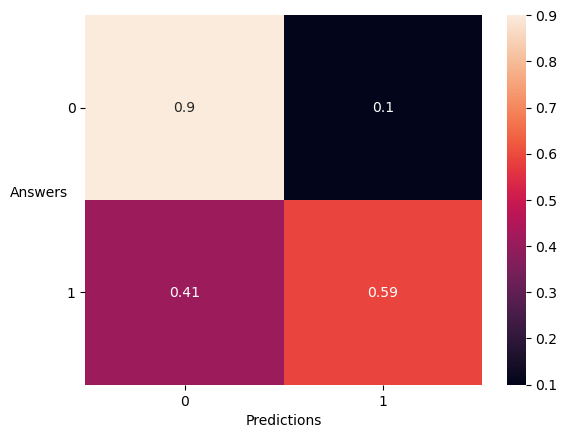

Recall: 0.5888324873096447
Precision: 0.6203208556149733
F1-score: 0.6041666666666666


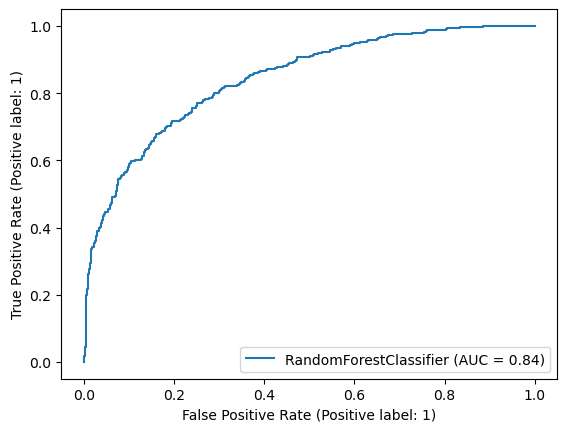

In [39]:
model = RandomForestClassifier(n_estimators=68, max_depth=13, 
                               class_weight='balanced', random_state=57)

model.fit(features_sampled, target_sampled)
predicted_test = model.predict(features_test)

print('RandomForestClassifier:')
print('Accuracy:', model.score(features_test, target_test))
print('Depth:', model.max_depth)
print('Estimators:', model.n_estimators, '\n')

print('Confusion matrix:')
print(confusion_matrix(target_test, predicted_test))
fig, ax = plt.subplots()
fig = sb.heatmap(confusion_matrix(target_test, predicted_test, normalize='true'), annot=True)
plt.yticks(rotation=0)
ax.set_ylabel('Answers', rotation=0);
ax.set_xlabel('Predictions');
ax.yaxis.labelpad = 20
plt.show()

print('Recall:', recall_score(target_test, predicted_test))
print('Precision:', precision_score(target_test, predicted_test))
print('F1-score:', f1_score(target_test, predicted_test))
plot_roc_curve(model, features_test, target_test);
plt.show()

Полнота заметно упала (0.639 => 0.589). F1-метрика тоже (0.630 => 0.604), но всё же выше порога.

Ради интереса можно попробовать подобрать случайный лес с обучением и на тестовой, и на валидационной выборках.

Дисбаланс в выборках тут сохраняется и учитывается только моделью.

RandomForestClassifier:
Accuracy: 0.8152831225948324
Depth: 8
Estimators: 22 

Confusion matrix:
[[1214  211]
 [ 125  269]]


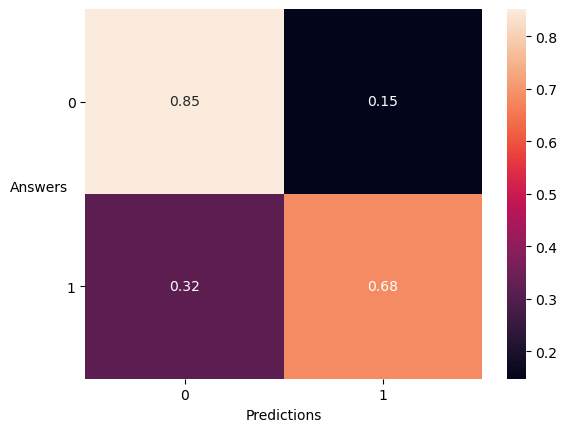

Recall: 0.682741116751269
Precision: 0.5604166666666667
F1-score: 0.6155606407322655


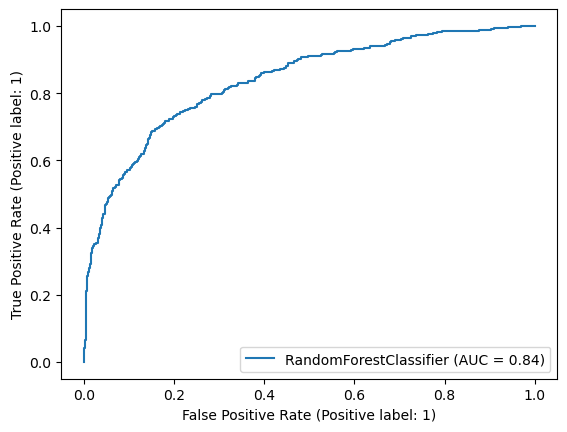

In [40]:
perfect_forest = plant_a_forest(pd.concat([features_train, features_valid]), 
                                pd.concat([target_train, target_valid]), 
                                features_test, 
                                target_test, 
                                'balanced')
print('RandomForestClassifier:')
print('Accuracy:', perfect_forest.score(features_test, target_test))
print('Depth:', perfect_forest.max_depth)
print('Estimators:', perfect_forest.n_estimators, '\n')

plot_confusion_matrix(perfect_forest, features_test, target_test)
roc_graph(perfect_forest, features_test, target_test)

Обе метрики выросли, но это скорее эффект переобучения, потому что цикл подбирает гиперпараметры под метрики. Оставим как было.

## Выводы

|Модель|Полнота|Точность|F1-мера|AUC-ROC|
|---|---|---|---|---|
|Логистическая регрессия|0.669|0.351|0.461|0.76|
|Решающее дерево|**0.745**|0.458|0.568|0.81|
|Случайный лес|0.639|**0.621**|**0.630**|**0.85**|

1. Среди данных о продолжительности отношений с клиентами есть 9% пропусков (скорее всего, случайных). Эти люди не учитывались в данной работе.
2. Балансировка классов заметно повышает качество модели. Помогает как присвоение классам весов (в соответствии с дисбалансом), так и увеличение частоты встречаемости объектов положительного класса (в 4 раза). Ниже рассмотрены модели, использующие и то, и другое.
3. Логистическая регрессия показала себя хуже деревьев. Хотя уходящих клиентов она предсказывает не хуже случайного леса, ошибок первого рода у неё гораздо больше.
4. Решающие деревья показывают хорошую полноту (при глубине 8), однако из-за низкой точности не прошли порог 0.59. В зависимости от целей эту модель можно принимать во внимание.
5. Самые высокие показатели у случайного леса (при 68 деревьях глубины 13). Тем не менее, эти показатели достигаются за счёт хороших предсказаний для объектов отрицательного класса, в то время как полнота по результатам тестирования оставляет желать лучшего.
6. По результатам тестирования F1-мера составила 0.604, полнота – 0.589, то есть модели более свойственны ошибки второго рода. 